In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()


Saving starbucks.csv to starbucks (1).csv


In [ ]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_cols)


Categorical Columns: Index(['Beverage_category', 'Beverage', 'Beverage_prep', ' Total Fat (g)',
       'Vitamin A (% DV) ', 'Vitamin C (% DV)', ' Calcium (% DV) ',
       'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')


In [ ]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
print("\nProcessed Dataset (Categorical → Numerical):")
print(df.head())


Processed Dataset (Categorical → Numerical):
   Beverage_category  Beverage  Beverage_prep  Calories   Total Fat (g)  \
0                  1         1              4         3               1   
1                  1         1              8         4               1   
2                  1         1              2         5               1   
3                  1         1             10         5               1   
4                  0         3              5        70               1   

   Trans Fat (g)   Saturated Fat (g)   Sodium (mg)   Total Carbohydrates (g)   \
0             0.0                0.0             0                          5   
1             0.0                0.0             0                         10   
2             0.0                0.0             0                         10   
3             0.0                0.0             0                         10   
4             0.1                0.0             5                         75   

   Cholesterol (

In [ ]:
from collections import defaultdict, deque

graph = defaultdict(list)

for _, row in df.iterrows():
    category = row['Beverage_category']
    beverage = row['Beverage']
    graph[category].append(beverage)
print("\nGraph Representation (Adjacency List):")
for key, value in graph.items():
    print(f"{key}: {value}")



Graph Representation (Adjacency List):
1.0: [1.0, 1.0, 1.0, 1.0]
0.0: [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 2.0, 2.0, 2.0, 2.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 11.0, 11.0, 22.0, 22.0, 22.0, 22.0]
6.0: [9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 8.0, 8.0, 8.0, 8.0]
8.0: [29.0, 29.0, 29.0, 29.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0]
5.0: [13.0, 13.0, 13.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 

In [ ]:
def bfs(graph, start_node):
    visited = set()
    queue = deque([start_node])
    print("\nBFS Traversal Output:")
    while queue:
        node = queue.popleft()
        if node not in visited:
            print(node)
            visited.add(node)
            if node in graph:
                queue.extend(graph[node])
start_node = "Coffee"
bfs(graph, start_node)



BFS Traversal Output:
Coffee


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict, deque

In [ ]:
G = nx.DiGraph()
graph = defaultdict(list)

for _, row in df.iterrows():
    category = row['Beverage_category']
    beverage = row['Beverage']


    G.add_node(category, color="lightblue")
    G.add_node(beverage, color="lightgreen")
    G.add_edge(category, beverage)

    graph[category].append(beverage)

print("Graph Structure (Adjacency List):")
for key, value in graph.items():
    print(f"{key} → {value}")


Graph Structure (Adjacency List):
1.0 → [1.0, 1.0, 1.0, 1.0]
0.0 → [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 2.0, 2.0, 2.0, 2.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 11.0, 11.0, 22.0, 22.0, 22.0, 22.0]
6.0 → [9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 8.0, 8.0, 8.0, 8.0]
8.0 → [29.0, 29.0, 29.0, 29.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0]
5.0 → [13.0, 13.0, 13.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 1

In [ ]:
def bfs_traversal(graph, start_node):
    visited = set()
    queue = deque([start_node])
    bfs_edges = []

    print("\nBFS Traversal Order:")
    while queue:
        node = queue.popleft()
        if node not in visited:
            print(node)
            visited.add(node)
            if node in graph:
                for neighbor in graph[node]:
                    if neighbor not in visited:
                        bfs_edges.append((node, neighbor))
                        queue.append(neighbor)
    return bfs_edges
start_node = "Coffee"
bfs_edges = bfs_traversal(graph, start_node)


BFS Traversal Order:
Coffee


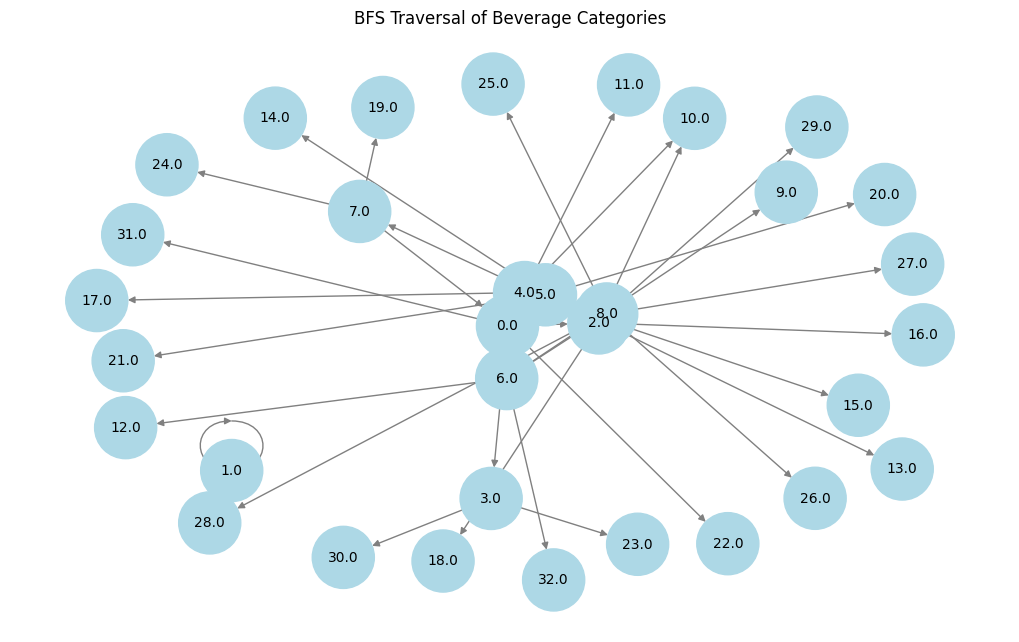

In [ ]:
node_colors = ["red" if node == start_node else "lightblue" for node in G.nodes]
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color="gray", node_size=2000, font_size=10)
nx.draw_networkx_edges(G, pos, edgelist=bfs_edges, edge_color="red", width=2)
plt.title("BFS Traversal of Beverage Categories")
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Create a directed graph
G = nx.DiGraph()

# Build adjacency list graph
graph = defaultdict(list)

for _, row in df.iterrows():
    category = row['Beverage_prep']
    beverage = row['Calories']

    # Add nodes and edges
    G.add_node(category, color="lightblue")
    G.add_node(beverage, color="lightgreen")
    G.add_edge(category, beverage)  # Connect category to beverage

    # Store in adjacency list
    graph[category].append(beverage)

# Display adjacency list structure
print("\nGraph Structure (Adjacency List):")
for key, value in graph.items():
    print(f"{key} → {value}")



Graph Structure (Adjacency List):
4.0 → [3.0, 5.0, 140.0, 0.0]
8.0 → [4.0, 10.0, 210.0, 0.0, 60.0, 60.0, 100.0]
2.0 → [5.0, 15.0, 280.0, 0.0, 90.0, 80.0, 130.0]
10.0 → [5.0, 25.0, 360.0, 0.0, 130.0, 120.0, 190.0]
5.0 → [70.0, 110.0, 100.0, 50.0, 60.0, 100.0, 180.0, 130.0, 100.0, 130.0, 80.0, 80.0]
0.0 → [100.0, 150.0, 190.0, 240.0, 130.0, 200.0, 260.0, 340.0, 130.0, 200.0, 250.0, 320.0, 80.0, 90.0, 120.0, 150.0, 120.0, 180.0, 240.0, 300.0, 200.0, 310.0, 400.0, 510.0, 150.0, 230.0, 290.0, 380.0, 120.0, 190.0, 240.0, 310.0, 170.0, 260.0, 350.0, 450.0, 90.0, 140.0, 190.0, 230.0, 90.0, 140.0, 190.0, 230.0, 90.0, 120.0, 180.0, 300.0, 270.0, 290.0]
7.0 → [70.0, 110.0, 150.0, 190.0, 110.0, 180.0, 230.0, 290.0, 110.0, 160.0, 210.0, 270.0, 50.0, 70.0, 100.0, 120.0, 100.0, 150.0, 200.0, 250.0, 180.0, 280.0, 370.0, 460.0, 130.0, 200.0, 250.0, 330.0, 110.0, 160.0, 220.0, 280.0, 140.0, 230.0, 310.0, 390.0, 80.0, 130.0, 170.0, 210.0, 80.0, 130.0, 170.0, 210.0, 80.0, 110.0, 170.0, 290.0, 270.0, 290.

In [ ]:
def dfs_traversal(graph, start_node, visited=None, dfs_edges=None):
    if visited is None:
        visited = set()
    if dfs_edges is None:
        dfs_edges = []

    print(start_node)  # Process node
    visited.add(start_node)

    if start_node in graph:
        for neighbor in graph[start_node]:
            if neighbor not in visited:
                dfs_edges.append((start_node, neighbor))
                dfs_traversal(graph, neighbor, visited, dfs_edges)

    return dfs_edges  # Return DFS traversal edges

# Start DFS from "Coffee"
start_node = "Short"
print("\nDFS Traversal Order:")
dfs_edges = dfs_traversal(graph, start_node)



DFS Traversal Order:
Short


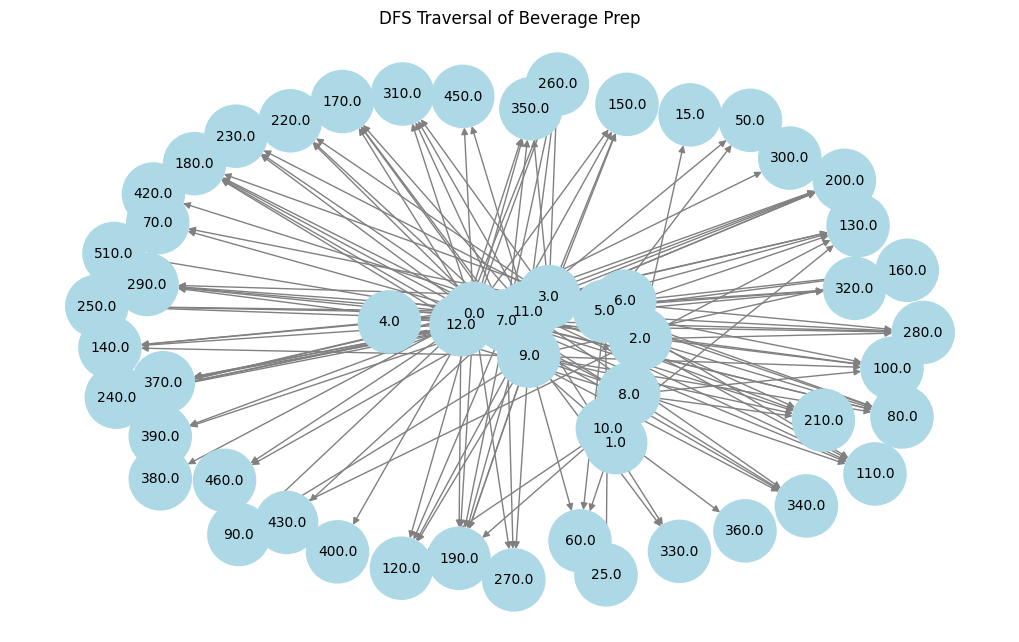

In [ ]:
# Set node colors
node_colors = ["red" if node == start_node else "lightblue" for node in G.nodes]

# Draw the full graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # Node positioning

# Draw all edges
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color="gray", node_size=2000, font_size=10)

# Highlight DFS edges in red
nx.draw_networkx_edges(G, pos, edgelist=dfs_edges, edge_color="red", width=2)

# Show the graph
plt.title("DFS Traversal of Beverage Prep")
plt.show()
